Student name: Annette Kalekye David

Student pace: part time

Scheduled project review date/time: 24TH OCTOBER 2023

Instructor name: Stella Waithera

**Churn Prediction Modeling**: **Predicting customer churn in SyriaTel**

**Business Understanding**

This project aims to predict customer churn for SyriaTel a telecommunications company, who want to retain customers to reduce revenue loss and increase customer lifetime.There is increased competition in telecommunications industry and most companies experience a very high churn rate which in turn leads to loss of revenue and acqusition costs.Retaining existing customers is the most cost effective method to keep business running compared to acquiring new ones.Identifying patterns or behaviours that preced customer churn will enable SyriaTel to proactively retain customers.The importance of data driven decision making in the current world cannot be ignored, therefore using machine learning models we can predict future churn to gain insights on actions that can be taken to prevent churn.

**Data Understanding**

The data used in this project is from SyriaTel telecommunications company: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

The data has 21 columns initially, it is customer churn data, the columns in the data are factors that contribute to the churn or not. some columns in the data are, Customer service calls, total day calls, total eve calls, total intl calls, the column churn indicates in trur/false whether the other columns affect it, making it the target variable in our analysis.We will use this information to predict the future churn and give insights into what can be done to reduce the churn rate by determining what contributes to churn.

Each observation in the dataset represents a specific time and charge for very customer, and the variables provide essential details about each customers attributes and churn status.

**Data Preparation**

In [3]:
#loading necessary libraries
import pandas as pd
import numpy as np
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading dataset**

In [4]:
#loading our data set for analysis and cleaning
df = pd.read_csv('syriaTel_Customer_churn.csv', index_col=0)
#previewing our dataset
df.head(4)

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


**Data exploration and understanding**

In [5]:
#To get an overview/summary of our dataset, this includes nn- null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

+ The dataframe has a total of 3333 rows and 20 columns

+ The data rows and columns are equal,this means our data is clean we proceed with data exploration to observe and analyse relationships within our dataset

**Exploratory Data Analysis**

+ We visualize the data to gain insights, identify patterns and understand relationshipd between the data variables.This will also prepare our data for further modeling.
+ Below is the summary of the EDA methods we have applied to our data.

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


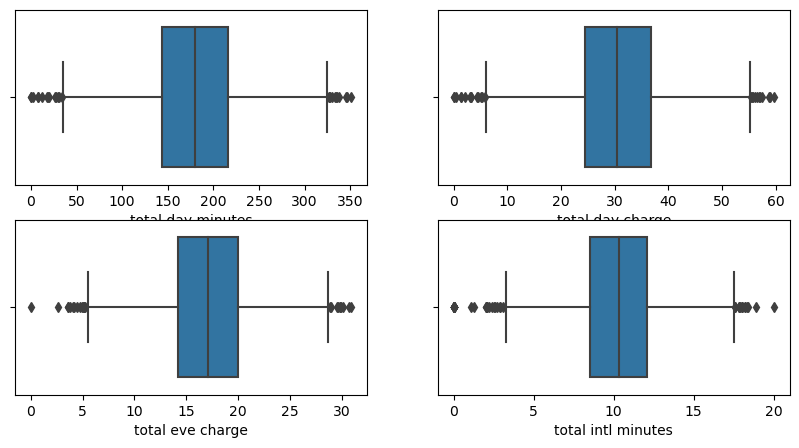

In [7]:
#finding outliers in our dataset with numerical columns
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data = df,x='total day minutes', ax = axs[0,0])
plt2 = sns.boxplot(data = df,x='total day charge', ax = axs[0,1])
plt3 = sns.boxplot(data = df,x='total eve charge', ax = axs[1,0])
plt4 = sns.boxplot(data = df,x='total intl minutes', ax = axs[1,1])

plt.show()

+ We plotted boxplots to check for outliers in our numerical data, extreme outliers are likely to affect our modeling when the values are significant for continus data, the above outliers may not have a significant effect on our model.


**Distribution of numerical columns**

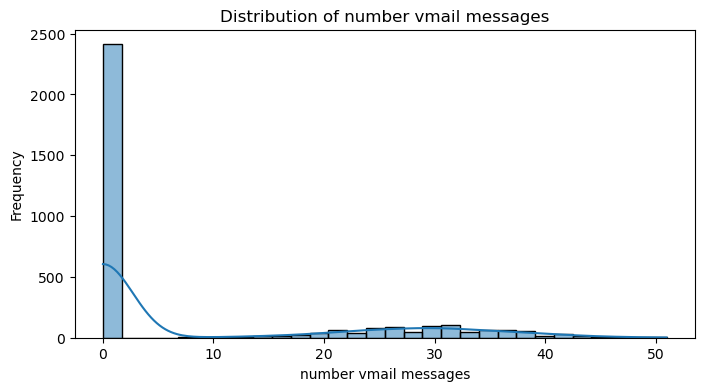

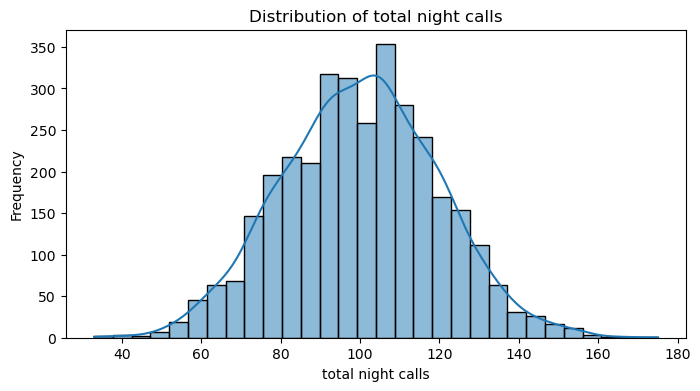

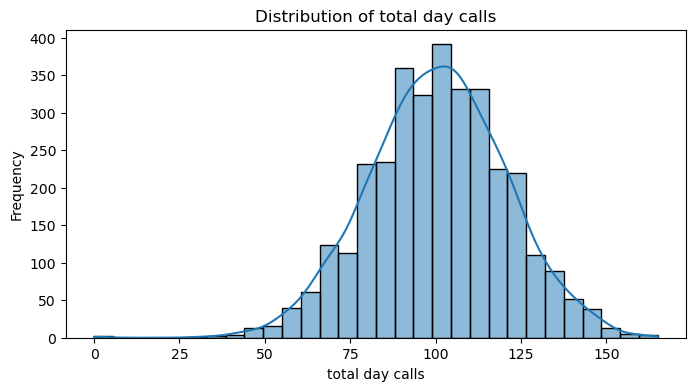

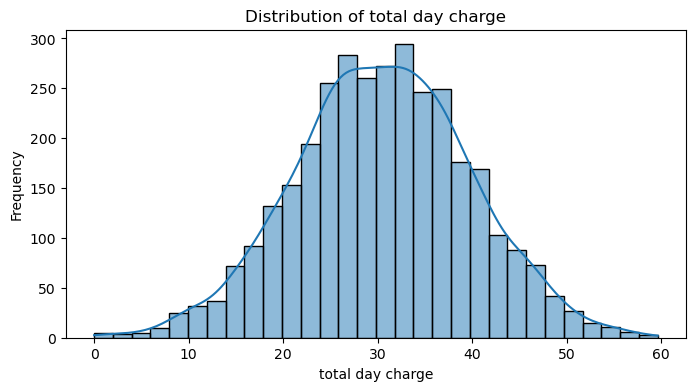

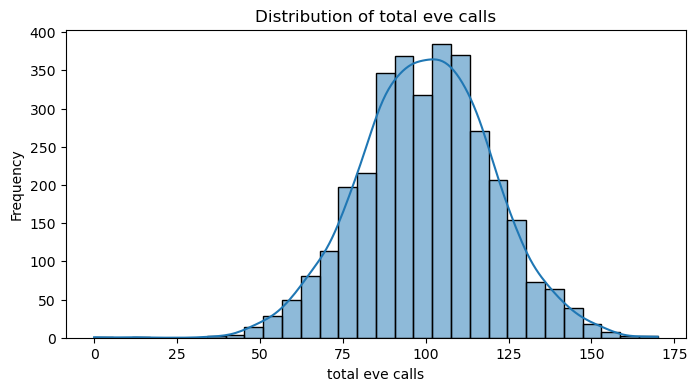

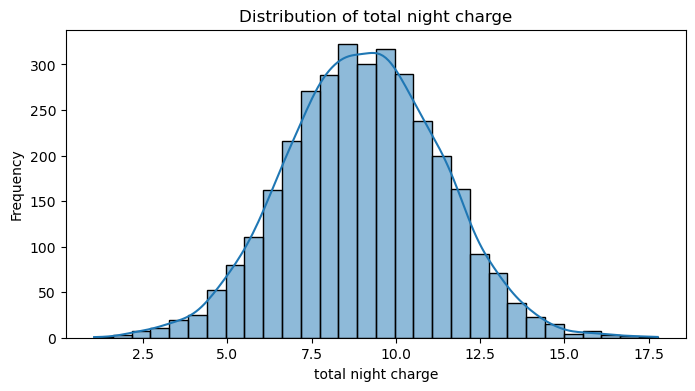

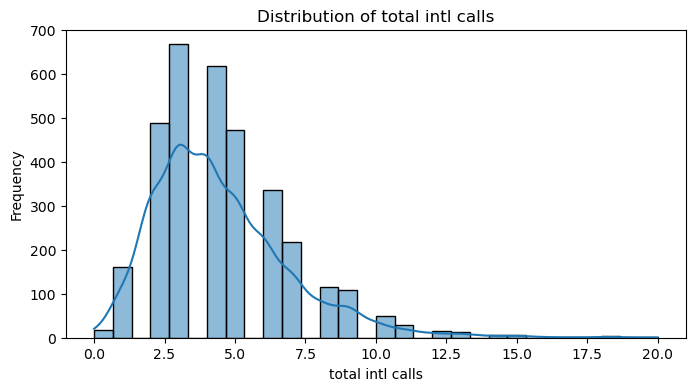

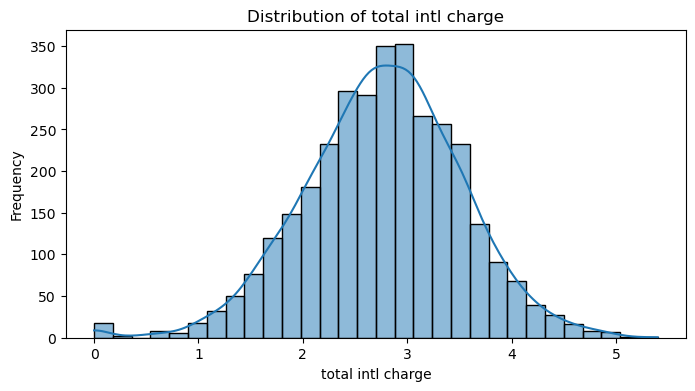

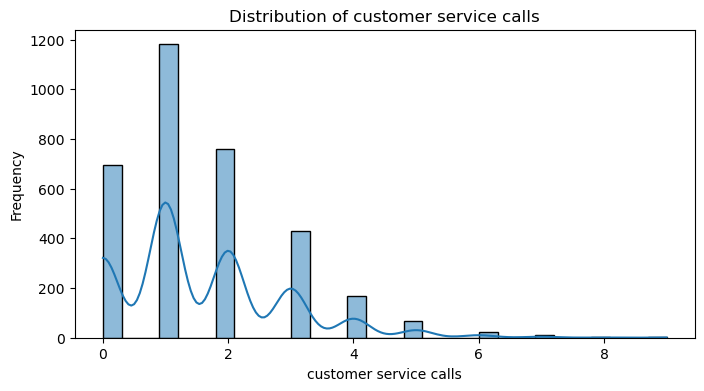

In [8]:
# univariate analysis for numerical columns that have effect on our churn 
numerical_columns= ['number vmail messages','total night calls', 'total day calls', 'total day charge', 'total eve calls', 'total night charge',  'total intl calls', 'total intl charge', 'customer service calls']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Distribution of categorical columns by value counts**

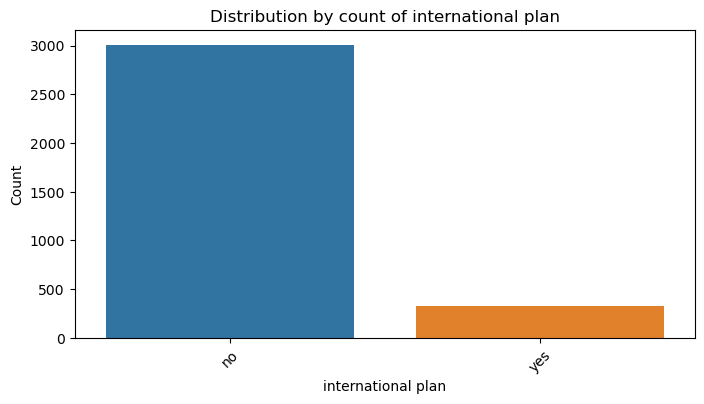

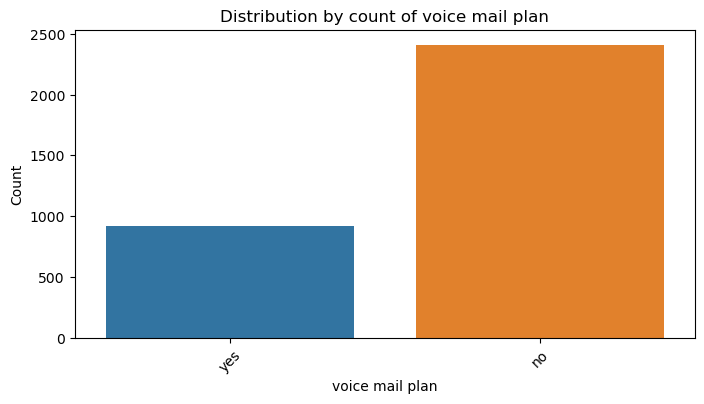

In [9]:
# Bar plot for categorical columns
categorical_columns = ['international plan', 'voice mail plan']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution by count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

+ Most customers do not have international plans or voice mail plans.

**Bivariate analysis** 

+ Numerical vs. Churn: we use scatter plots to compare numerical features between churned and non-churned customers.

In [10]:
# Now 'churn' column is of integer data type (0 for False, 1 for True)
df['churn'] = df['churn'].astype(int) 

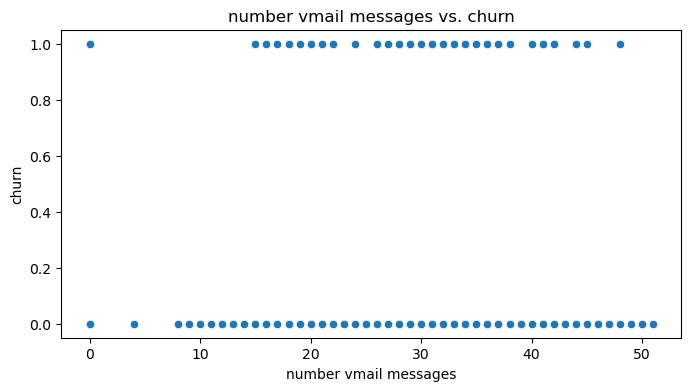

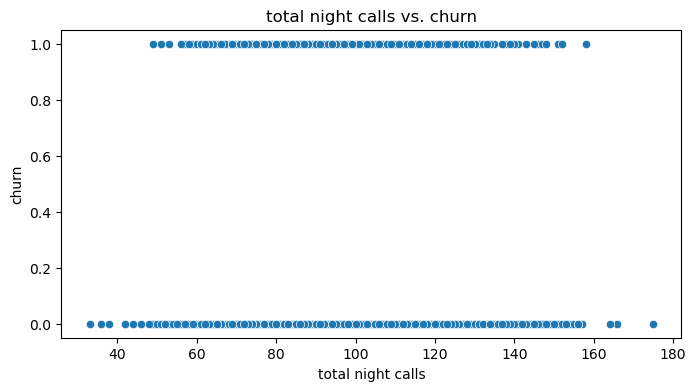

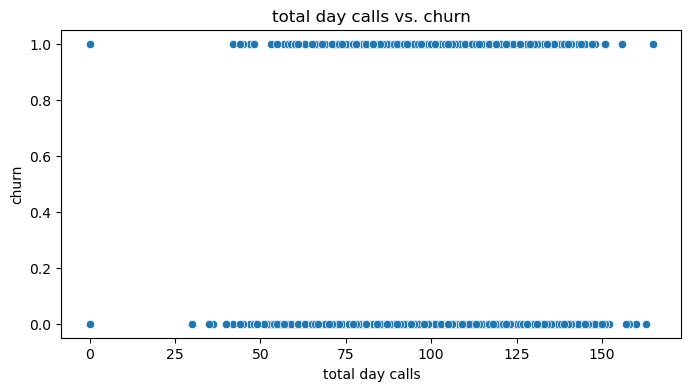

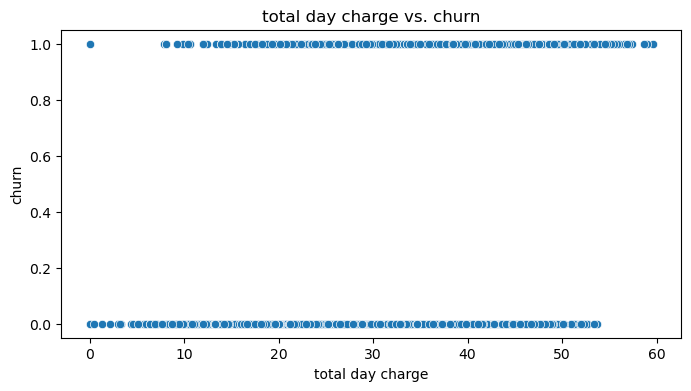

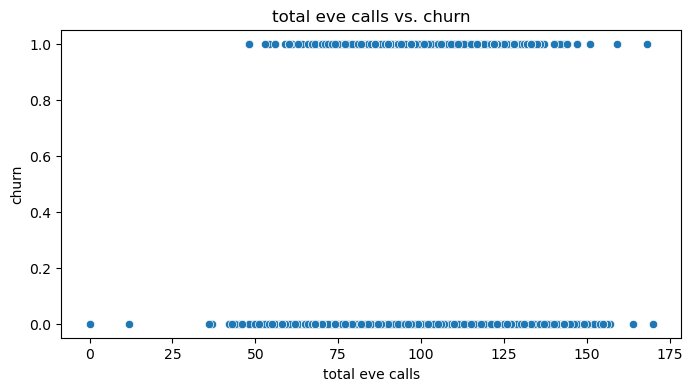

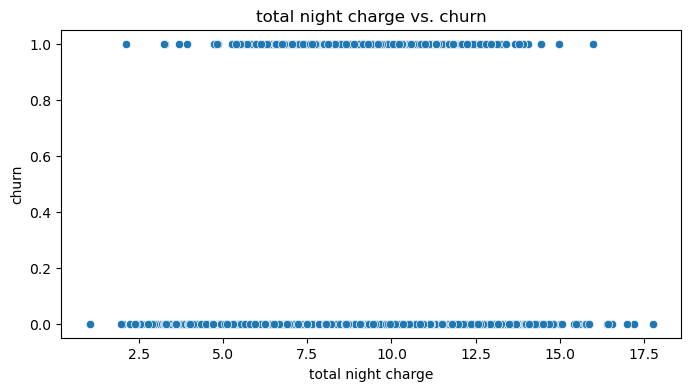

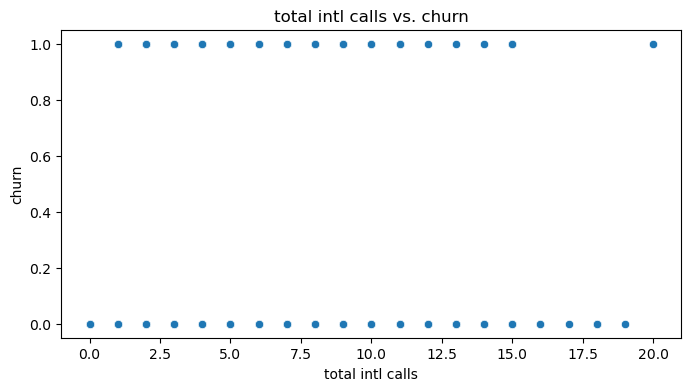

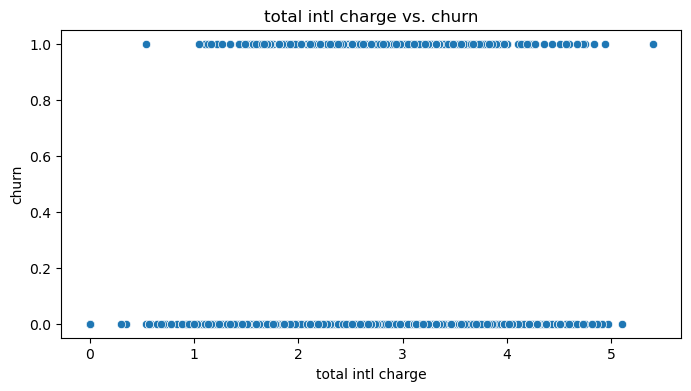

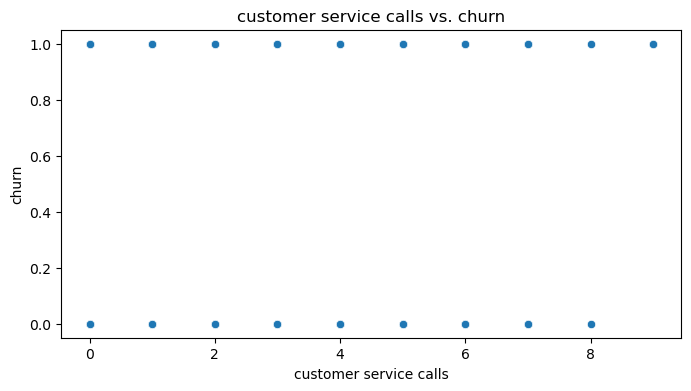

In [11]:
# Scatter plots for relationships between numerical columns and price

numerical_columns= ['number vmail messages','total night calls', 'total day calls', 'total day charge', 'total eve calls', 'total night charge',  'total intl calls', 'total intl charge', 'customer service calls']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='churn')
    plt.title(f'{col} vs. churn')
    plt.xlabel(col)
    plt.ylabel('churn')
    plt.show()

**Relationships between churn and categorical columns**

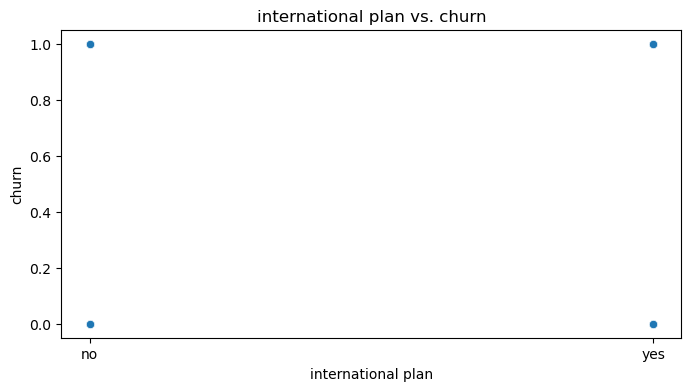

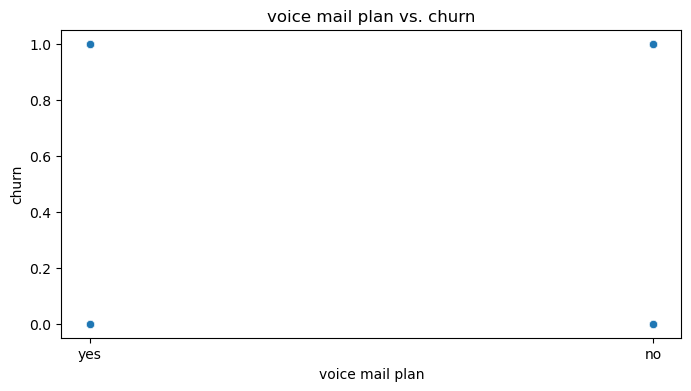

In [12]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='churn')
    plt.title(f'{col} vs. churn')
    plt.xlabel(col)
    plt.ylabel('churn')
    plt.show()

**Modeling**

Encoding categorical variables before we use our data to train our models

In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'international plan' and 'voice mail plan' are your categorical columns in the DataFrame 'df'
label_encoder = LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

**Feature engineering**
+   we are creating features that may be useful in our modelling or creating new ones mainly to improve our model performance

1. Total Call Minutes, Total Call Charges, Average Call Duration:

In [14]:
# Total Call Minutes
df['total_call_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Total Call Charges
df['total_call_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# Average Call Duration
df['average_call_duration'] = df['total_call_minutes'] / (df['total day calls'] + df['total eve calls'] + df['total night calls'])


2.Customer Service Interaction:

In [15]:
# Customer Service Interaction  where 1 if made a customer service call, else 0
df['customer_service_interaction'] = (df['customer service calls'] > 0).astype(int)

# Customer Service Calls Count


2. Usage Patterns:

In [16]:
# Call Frequency
df['call_frequency'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# International Call Ratio
df['international_call_ratio'] = df['total intl calls'] / df['call_frequency']

# Night Call Ratio
df['night_call_ratio'] = df['total night calls'] / df['call_frequency']


4. Time-of-Day Patterns:

In [17]:
# Daytime Calls
df['daytime_calls'] = df['total day calls']

# Evening Calls
df['evening_calls'] = df['total eve calls']

# Night Calls
df['night_calls'] = df['total night calls']


5. Combining Features:

In [18]:
# Total Charge per Call
df['total_charge_per_call'] = df['total_call_charges'] / df['call_frequency']

# Total Charge per Minute
df['total_charge_per_minute'] = df['total_call_charges'] / df['total_call_minutes']


6. Binary Features:

In [19]:
# Has International Plan (binary: 1 if 'yes', else 0)
df['has_international_plan'] = (df['international plan'] == 'yes').astype(int)

# Has Voicemail Plan (binary: 1 if 'yes', else 0)
df['has_voicemail_plan'] = (df['voice mail plan'] == 'yes').astype(int)

In [20]:
df.head() #inspecting data for the added columns

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,call_frequency,international_call_ratio,night_call_ratio,daytime_calls,evening_calls,night_calls,total_charge_per_call,total_charge_per_minute,has_international_plan,has_voicemail_plan
state,,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,...,300,0.010000,0.303333,110,99,91,0.242867,0.103026,0,0
OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,...,329,0.009119,0.313070,123,103,103,0.168815,0.090826,0,0
NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,...,328,0.015244,0.317073,114,110,104,0.179878,0.111912,0,0
OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,...,248,0.028226,0.358871,71,88,89,0.262177,0.116482,0,0
OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,...,356,0.008427,0.339888,113,122,121,0.138652,0.098346,0,0


**Feature Selection**
+ This involves identifying the most relevant features from my dataset to improve the model's accuracy, reduce overfitting, and speed up training.

1. Correlation Matrix:Compute the correlation matrix to identify relationships between features and the target variable ('churn'). Positive or negative correlations closer to 1 or -1 indicate strong relationships.

In [22]:
# Use the 'drop()' method to remove the 'phone number' column
df = df.drop('phone number', axis=1)

In [23]:
correlation_matrix = df.corr()
print(correlation_matrix['churn'].sort_values(ascending=False))


churn                           1.000000
international plan              0.259852
total_call_charges              0.226962
customer service calls          0.208750
total day minutes               0.205151
total day charge                0.205151
total_call_minutes              0.196457
total_charge_per_call           0.177375
average_call_duration           0.141012
total_charge_per_minute         0.099245
total eve minutes               0.092796
total eve charge                0.092786
total intl charge               0.068259
total intl minutes              0.068239
total night charge              0.035496
total night minutes             0.035493
call_frequency                  0.019651
customer_service_interaction    0.018874
daytime_calls                   0.018459
total day calls                 0.018459
account length                  0.016541
evening_calls                   0.009233
total eve calls                 0.009233
area code                       0.006174
total night call

**Data Splitting**

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['churn'])  # Features (all columns except 'churn')
y = df['churn']  # Target variable

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are your training data
# X_test and y_test are your testing data

+ X represents  features from the dataset.
+ y represents the target variable (in this case, the 'churn' column).
+ test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.
+ random_state=42 ensures that the split is reproducible. Setting a random state ensures that every time we run the code, we get the same split, which is important for reproducibility and comparison between different models.

**Building and optimizing models**

1. Baseline Model (Logistic Regression):

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
baseline_model = LogisticRegression(random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

# Predictions on the test set
baseline_predictions = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Model Accuracy: {:.2f}%".format(baseline_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, baseline_predictions))


Baseline Model Accuracy: 85.31%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.67      0.06      0.11       101

    accuracy                           0.85       667
   macro avg       0.76      0.53      0.51       667
weighted avg       0.83      0.85      0.80       667



c:\Users\Hp\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ Accuracy: This indicates that the model correctly predicted 85.31% of the cases in the dataset. Accuracy is the ratio of correctly predicted instances to the total instances.
+ classification Report:
A classification report provides detailed information about the model's performance for each class (in this case, classes 0 and 1)
+ Class 0:

Precision: Precision for class 0 is 0.86. Precision measures the accuracy of the positive predictions. In this context, it means that 86% of the instances predicted as class 0 were actually class 0.

Recall: Recall for class 0 is 0.99. Recall measures the ability of the model to correctly identify all relevant instances. Here, it means that 99% of the actual class 0 instances were correctly predicted by the model.

F1-score: F1-score for class 0 is 0.92. F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates good performance.

Support: The number of actual occurrences of class 0 is 566.

+ Class 1:

Precision: Precision for class 1 is 0.67. This means that 67% of the instances predicted as class 1 were actually class 1.

Recall: Recall for class 1 is 0.06. Only 6% of the actual class 1 instances were correctly predicted by the model. This is a low recall, indicating that the model struggled to identify class 1 instances.

F1-score: F1-score for class 1 is 0.11. The low F1-score suggests that the model's ability to identify class 1 instances is not very good.

Support: The number of actual occurrences of class 1 is 101.

+ Macro avg: This is the average of precision, recall, and F1-score calculated independently for each class. it shows the average performance across both classes.
+ Weighted avg: This is the weighted average of precision, recall, and F1-score, considering the number of samples in each class. It provides a more balanced average, especially when the class distribution is imbalanced.

The model has a relatively high accuracy due to the majority of the data being in class 0
the model struggles significantly with class 1, as indicated by the low recall and F1-score for that class.Improving the model's ability to identify class 1 instances should be a priority for enhancing its overall performance.

2. Complex Model (Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
complex_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
complex_model.fit(X_train, y_train)

# Predictions on the test set
complex_predictions = complex_model.predict(X_test)

# Evaluate the complex model
complex_accuracy = accuracy_score(y_test, complex_predictions)
print("Complex Model (Random Forest) Accuracy: {:.2f}%".format(complex_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, complex_predictions))


Complex Model (Random Forest) Accuracy: 97.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.97      0.83      0.89       101

    accuracy                           0.97       667
   macro avg       0.97      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667



+ Accuracy: The model correctly predicted 97.00% of the cases in the dataset. Accuracy is the ratio of correctly predicted instances to the total instances.
+ Class 0:
Precision: Precision for class 0 is 0.97. Precision measures the accuracy of the positive predictions. In this context, it means that 97% of the instances predicted as class 0 were actually class 0.

Recall: Recall for class 0 is 0.99. Recall (Sensitivity) measures the ability of the model to correctly identify all relevant instances. Here, it means that 99% of the actual class 0 instances were correctly predicted by the model.

F1-score: F1-score for class 0 is 0.98. F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates good performance.

Support: The number of actual occurrences of class 0 is 566.

+ Class 1:
Precision: Precision for class 1 is 0.97. This means that 97% of the instances predicted as class 1 were actually class 1.

Recall: Recall for class 1 is 0.83. 83% of the actual class 1 instances were correctly predicted by the model. While this is decent, it suggests that the model struggles more with identifying class 1 instances compared to class 0.

F1-score: F1-score for class 1 is 0.89. The F1-score suggests that the model's ability to identify class 1 instances is reasonably good, although there is room for improvement.

Support: The number of actual occurrences of class 1 is 101.


+ Macro avg: This is the average of precision, recall, and F1-score calculated independently for each class. In this case, it shows the average performance across both classes.
+ Weighted avg: This is the weighted average of precision, recall, and F1-score, considering the number of samples in each class. It provides a more balanced average, especially when the class distribution is imbalanced.
In summary, the complex model (Random Forest) performed exceptionally well with a high accuracy of 97.00%. It excelled in identifying class 0 instances (non-churn), with high precision, recall, and F1-score. For class 1 instances (churn), the precision and F1-score are good, but the recall is slightly lower, indicating that there is room for improvement in identifying churn cases.

3. Hyperparameter Tuning (Random Forest):

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_params = grid_search.best_params_
tuned_model = RandomForestClassifier(**best_params, random_state=42)
tuned_model.fit(X_train, y_train)
tuned_predictions = tuned_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_predictions)

print("Tuned Random Forest Model Accuracy: {:.2f}%".format(tuned_accuracy * 100))
print("Best Hyperparameters:", best_params)
print("Classification Report:\n", classification_report(y_test, tuned_predictions))

Tuned Random Forest Model Accuracy: 97.00%
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.97      0.83      0.89       101

    accuracy                           0.97       667
   macro avg       0.97      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667



+ Accuracy: The model correctly predicted 97.00% of the cases in the dataset after hyperparameter tuning. 

max_depth: No maximum depth limit for the decision trees in the forest.

min_samples_leaf: The minimum number of samples required to be at a leaf node.it's set to 1, meaning each leaf node must have at least one sample.

min_samples_split: The minimum number of samples a node must have to be split further. It's set to 2, meaning a node must have at least 2 samples to split.

n_estimators: The number of trees in the Random Forest ensemble is set to 100.

+ Class 0:
Precision: Precision for class 0 is 0.97. This means that 97% of the instances predicted as class 0 were actually class 0.

Recall: Recall for class 0 is 0.99. 99% of the actual class 0 instances were correctly predicted by the model.

F1-score: F1-score for class 0 is 0.98. A high F1-score indicates good balance between precision and recall.

Support: The number of actual occurrences of class 0 is 566.

+ Class 1:

Precision: Precision for class 1 is 0.97. This means that 97% of the instances predicted as class 1 were actually class 1.

Recall: Recall for class 1 is 0.83. 83% of the actual class 1 instances were correctly predicted by the model.

F1-score: F1-score for class 1 is 0.89. A relatively good F1-score, although there's room for improvement in recall.

Support: The number of actual occurrences of class 1 is 101.

Macro avg: it shows the average performance across both classes.This is the average of precision, recall, and F1-score calculated independently for each class.
Weighted avg: This is the weighted average of precision, recall, and F1-score, considering the number of samples in each class.

+ The tuned Random Forest model performs exceptionally well with a high accuracy of 97.00%. It excels in identifying class 0 instances (non-churn) with high precision, recall, and F1-score. For class 1 instances (churn), the precision is good, but the recall could be improved to better identify churn cases.

**Model Evaluation**
the evaluate_model function calculates accuracy, precision, recall, F1-score, and ROC AUC score for the predicted labels and true labels. These metrics provide an understanding of the model's performance. we will compare these metrics for our baseline, complex, and tuned models to assess their effectiveness in predicting customer churn.

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function for model evaluation
def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    roc_auc = roc_auc_score(true_labels, predictions)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate Baseline Model
baseline_accuracy, baseline_precision, baseline_recall, baseline_f1, baseline_roc_auc = evaluate_model(baseline_predictions, y_test)

# Evaluate Complex Model (Random Forest)
complex_accuracy, complex_precision, complex_recall, complex_f1, complex_roc_auc = evaluate_model(complex_predictions, y_test)

# Evaluate Tuned Model (Random Forest)
tuned_accuracy, tuned_precision, tuned_recall, tuned_f1, tuned_roc_auc = evaluate_model(tuned_predictions, y_test)

# Print evaluation metrics
print("Baseline Model Metrics:")
print("Accuracy: {:.2f}".format(baseline_accuracy))
print("Precision: {:.2f}".format(baseline_precision))
print("Recall: {:.2f}".format(baseline_recall))
print("F1 Score: {:.2f}".format(baseline_f1))
print("ROC AUC: {:.2f}".format(baseline_roc_auc))
print("\nComplex Model Metrics:")
print("Accuracy: {:.2f}".format(complex_accuracy))
print("Precision: {:.2f}".format(complex_precision))
print("Recall: {:.2f}".format(complex_recall))
print("F1 Score: {:.2f}".format(complex_f1))
print("ROC AUC: {:.2f}".format(complex_roc_auc))
print("\nTuned Model Metrics:")
print("Accuracy: {:.2f}".format(tuned_accuracy))
print("Precision: {:.2f}".format(tuned_precision))
print("Recall: {:.2f}".format(tuned_recall))
print("F1 Score: {:.2f}".format(tuned_f1))
print("ROC AUC: {:.2f}".format(tuned_roc_auc))


Baseline Model Metrics:
Accuracy: 0.85
Precision: 0.67
Recall: 0.06
F1 Score: 0.11
ROC AUC: 0.53

Complex Model Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.83
F1 Score: 0.89
ROC AUC: 0.91

Tuned Model Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.83
F1 Score: 0.89
ROC AUC: 0.91


In  addition to my model interpretations above in the models to define and interpret ROC AUC for all models:
+ Baseline Model:
ROC AUC: 0.53 - ROC AUC (Receiver Operating Characteristic Area Under Curve) measures the model's ability to distinguish between positive and negative classes. 0.53 indicates the model's performance is not much better than random chance.

+ Complex Model:
ROC AUC: 0.91 - suggests a strong ability to distinguish between positive and negative classes.

+ Tuned Model:
ROC AUC: 0.91 - suggests a strong ability to distinguish between positive and negative classes.

**Interpretation and Recommendations:**

1. Feature Importance
For the Random Forest model, we visualize feature importance to understand which features are most influential in predicting churn.

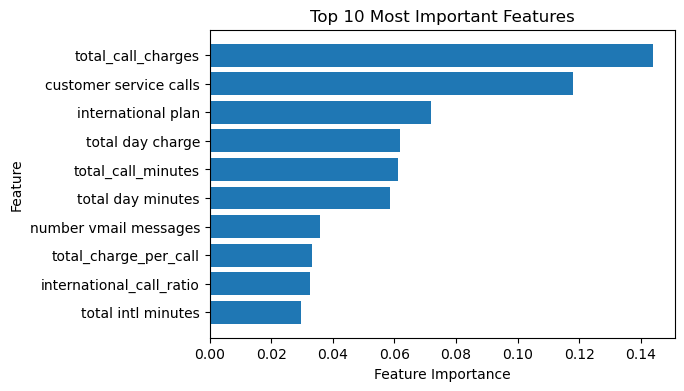

In [28]:
import matplotlib.pyplot as plt

# Get feature importances from the tuned Random Forest model
feature_importances = tuned_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_features = 10
plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df['Feature'][:top_features], feature_importance_df['Importance'][:top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(top_features))
plt.gca().invert_yaxis()
plt.show()


2. Contextual Analysis: scenarios where the model's predictions are useful. 

+ High Usage Patterns: The model's predictions might be accurate for customers with high usage patterns, such as those making a large number of calls, using extensive data, or frequently using international services. High usage may correlate with loyal customers less likely to churn.
+ Short Contract Lengths: Customers with short contract lengths (e.g., month-to-month plans) might be accurately predicted by the model. Short-term customers may be more prone to churn compared to those with long-term contracts.
+ Customers with Customer Service Interactions: The model might be useful for customers who frequently interact with customer service. High numbers of customer service calls could indicate customer dissatisfaction and potential churn.
+ Specific Service Subscriptions: Certain service subscriptions, such as international plans or additional features like voicemail, might influence churn. The model may excel in predicting churn for customers with these specific services.
+ Customer Segmentation: Demographic factors like age, location, or income can influence churn patterns. If specific segments have distinct churn behavior, the model could be useful in predicting churn within these segments.

Limitations of the model

+ Low Churn Rate: If the dataset has a low churn rate,the model might struggle to accurately predict churn due to class imbalance. It might be biased towards predicting the majority class (non-churn) and overlook churn instances.
+ Change of Customer Behavior: Customer behavior is not rigid it changes over time. Patterns that were relevant in the past might not be indicative of churn in the future. The model might struggle to adapt to evolving customer preferences and behaviors.
+ Unseen Patterns: If the model was not trained on specific patterns (e.g., new services or marketing strategies), it might not accurately predict churn in situations it has not encountered before.
+ Limited Features: If crucial features related to customer satisfaction, like survey results or social media sentiment, are not included, the   model might lack vital information to make accurate predictions.
+ Data Quality: Inaccurate or incomplete data can lead to misinformed predictions. Missing or erroneous data points might affect the model's performance negatively.

3. Business Recommendations:

+ **Targeted Marketing Campaigns**: Focus marketing efforts on customers identified as high-risk for churn. Tailor promotions, discounts, or offers based on their usage patterns and preferences.
+ **Customer Service Improvements**: Investigate the reasons behind customer service calls. If a significant portion of churned customers made multiple service calls, consider enhancing customer support, providing additional training to customer service representatives, or improving online self-service resources.
+ **Product/Service Enhancements**: Identify features or services that are popular among long-term customers. Consider expanding or promoting those features to attract new customers and retain existing ones.
+ **Customer Feedback Loop**: Establish a feedback mechanism to understand the reasons behind customer churn. Surveys, feedback forms, or follow-up emails can provide valuable insights into customer dissatisfaction, helping the company address specific pain points.